**WINE CLASSIFICATION USING NEURAL NETWORK** -- *Vinnie Tiang Wen Ying 22004876*

# **1) Data Preparation**

- Load the given dataset of chemical information about wine. 
- Merge the two datasets and prepare the data for modeling. 
- Split the dataset into training, validation and testing sets for model evaluation.

##**1a) Import the Libraries Needed**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Import library for model development
from sklearn.model_selection import train_test_split

# Import library for standardization/normalization of the features of dataset 
from sklearn.preprocessing import StandardScaler

# Import library for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

##**1b) Load the given dataset of chemical information about wine**

In [ ]:
# load data from CSV file into a pandas DataFrame
red = pd.DataFrame(pd.read_csv("winequality-red.csv", sep=';'))
white = pd.DataFrame(pd.read_csv("winequality-white.csv", sep=';'))

In [ ]:
# Show how the dataset looks like
red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [ ]:
# Show how the dataset looks like
white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

## **1c) Data Inspection : Explore the dataset to gain insights into the data**

In [ ]:
# Print info on white wine
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
# Print info on red wine
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

##**1d) Data Cleaning**

In [ ]:
#Checking for null values:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

*- There is no null value in the datasets*

- **Handle duplicate entries of white wine and red wine**

In [ ]:
# Check for duplicate entries
white_dup_count = white.duplicated().sum()
print(f"Number of duplicated entries for white wine dataset : {white_dup_count}")
red_dup_count = red.duplicated().sum()
print(f"Number of duplicated entries for red wine dataset :{red_dup_count}")

Number of duplicated entries for white wine dataset : 937
Number of duplicated entries for red wine dataset :240


In [ ]:
# Remove duplicate entries of white wine
white = white.drop_duplicates()
# Check if there is still duplicated entries in dataset of white wine
white.duplicated().sum()

0

In [ ]:
# Remove duplicate entries of red wine
red = red.drop_duplicates()
# Check if there is still duplicated entries in dataset of red wine
red.duplicated().sum()

0

##**1e) Exploratory Data Analytics (EDA)**

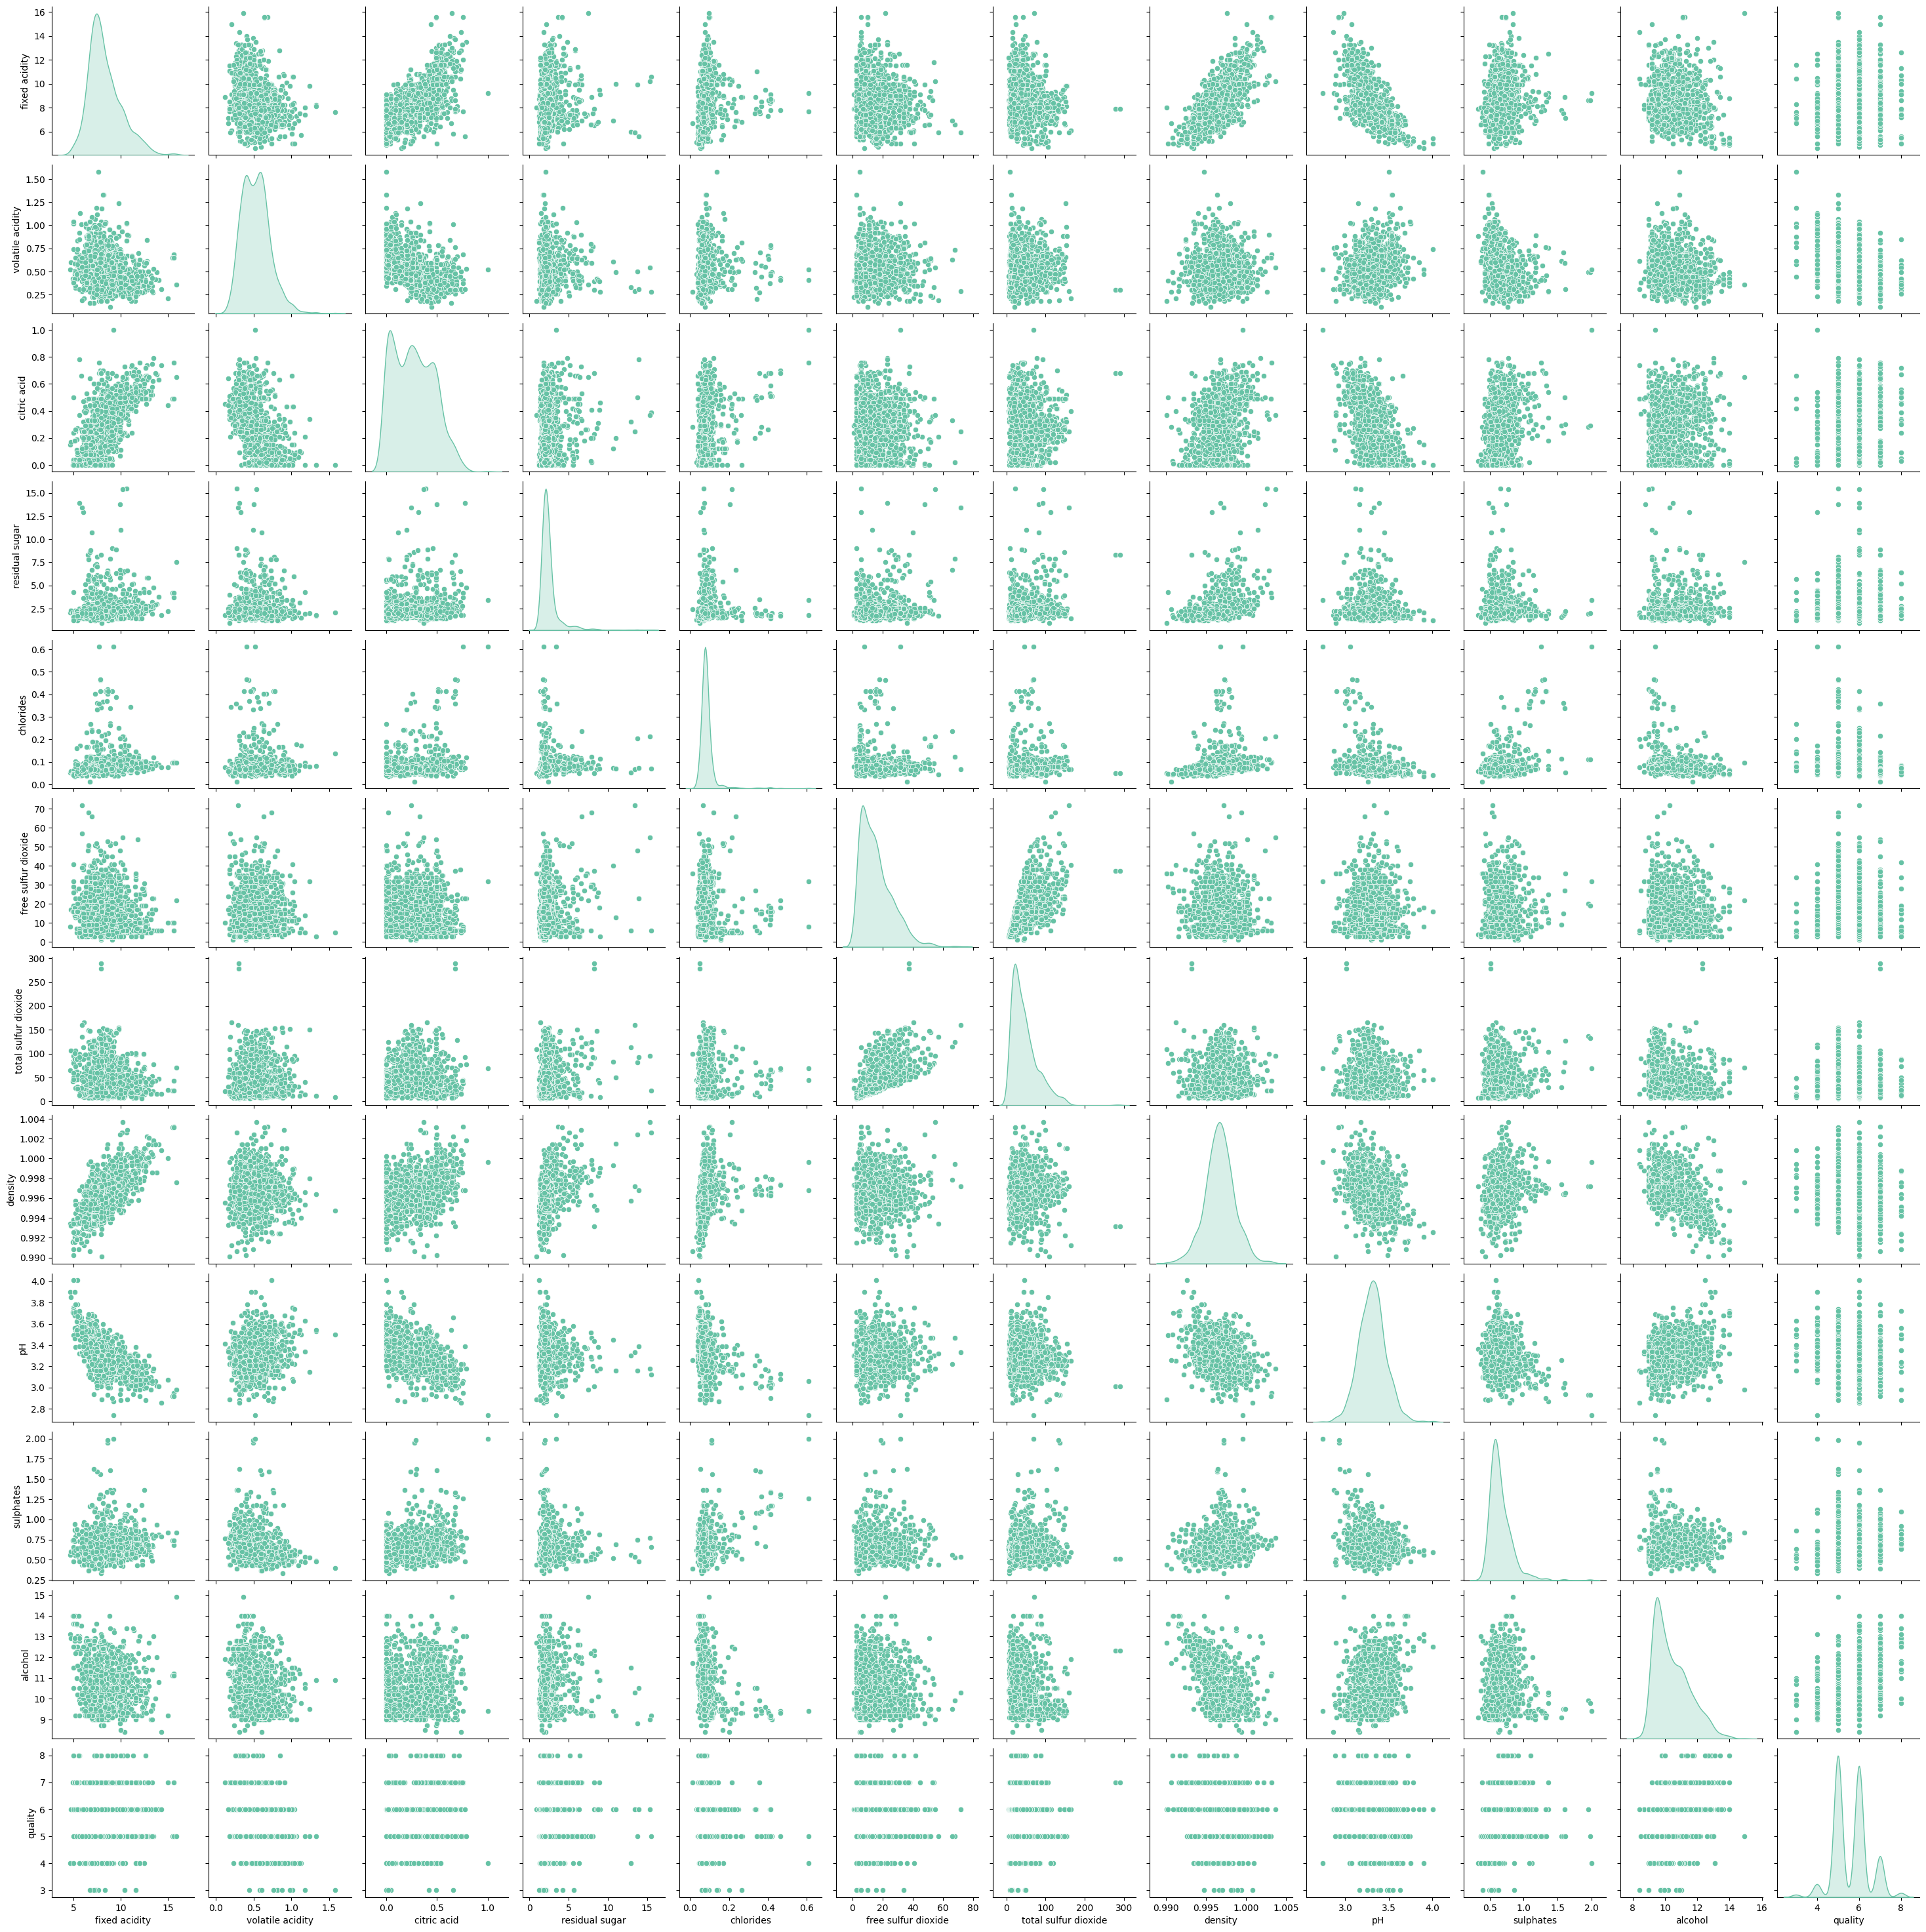

In [ ]:
# Visualize the numerical variables for 'red'
sns.set_palette("Set2")
sns.pairplot(data=red, diag_kind = 'kde')

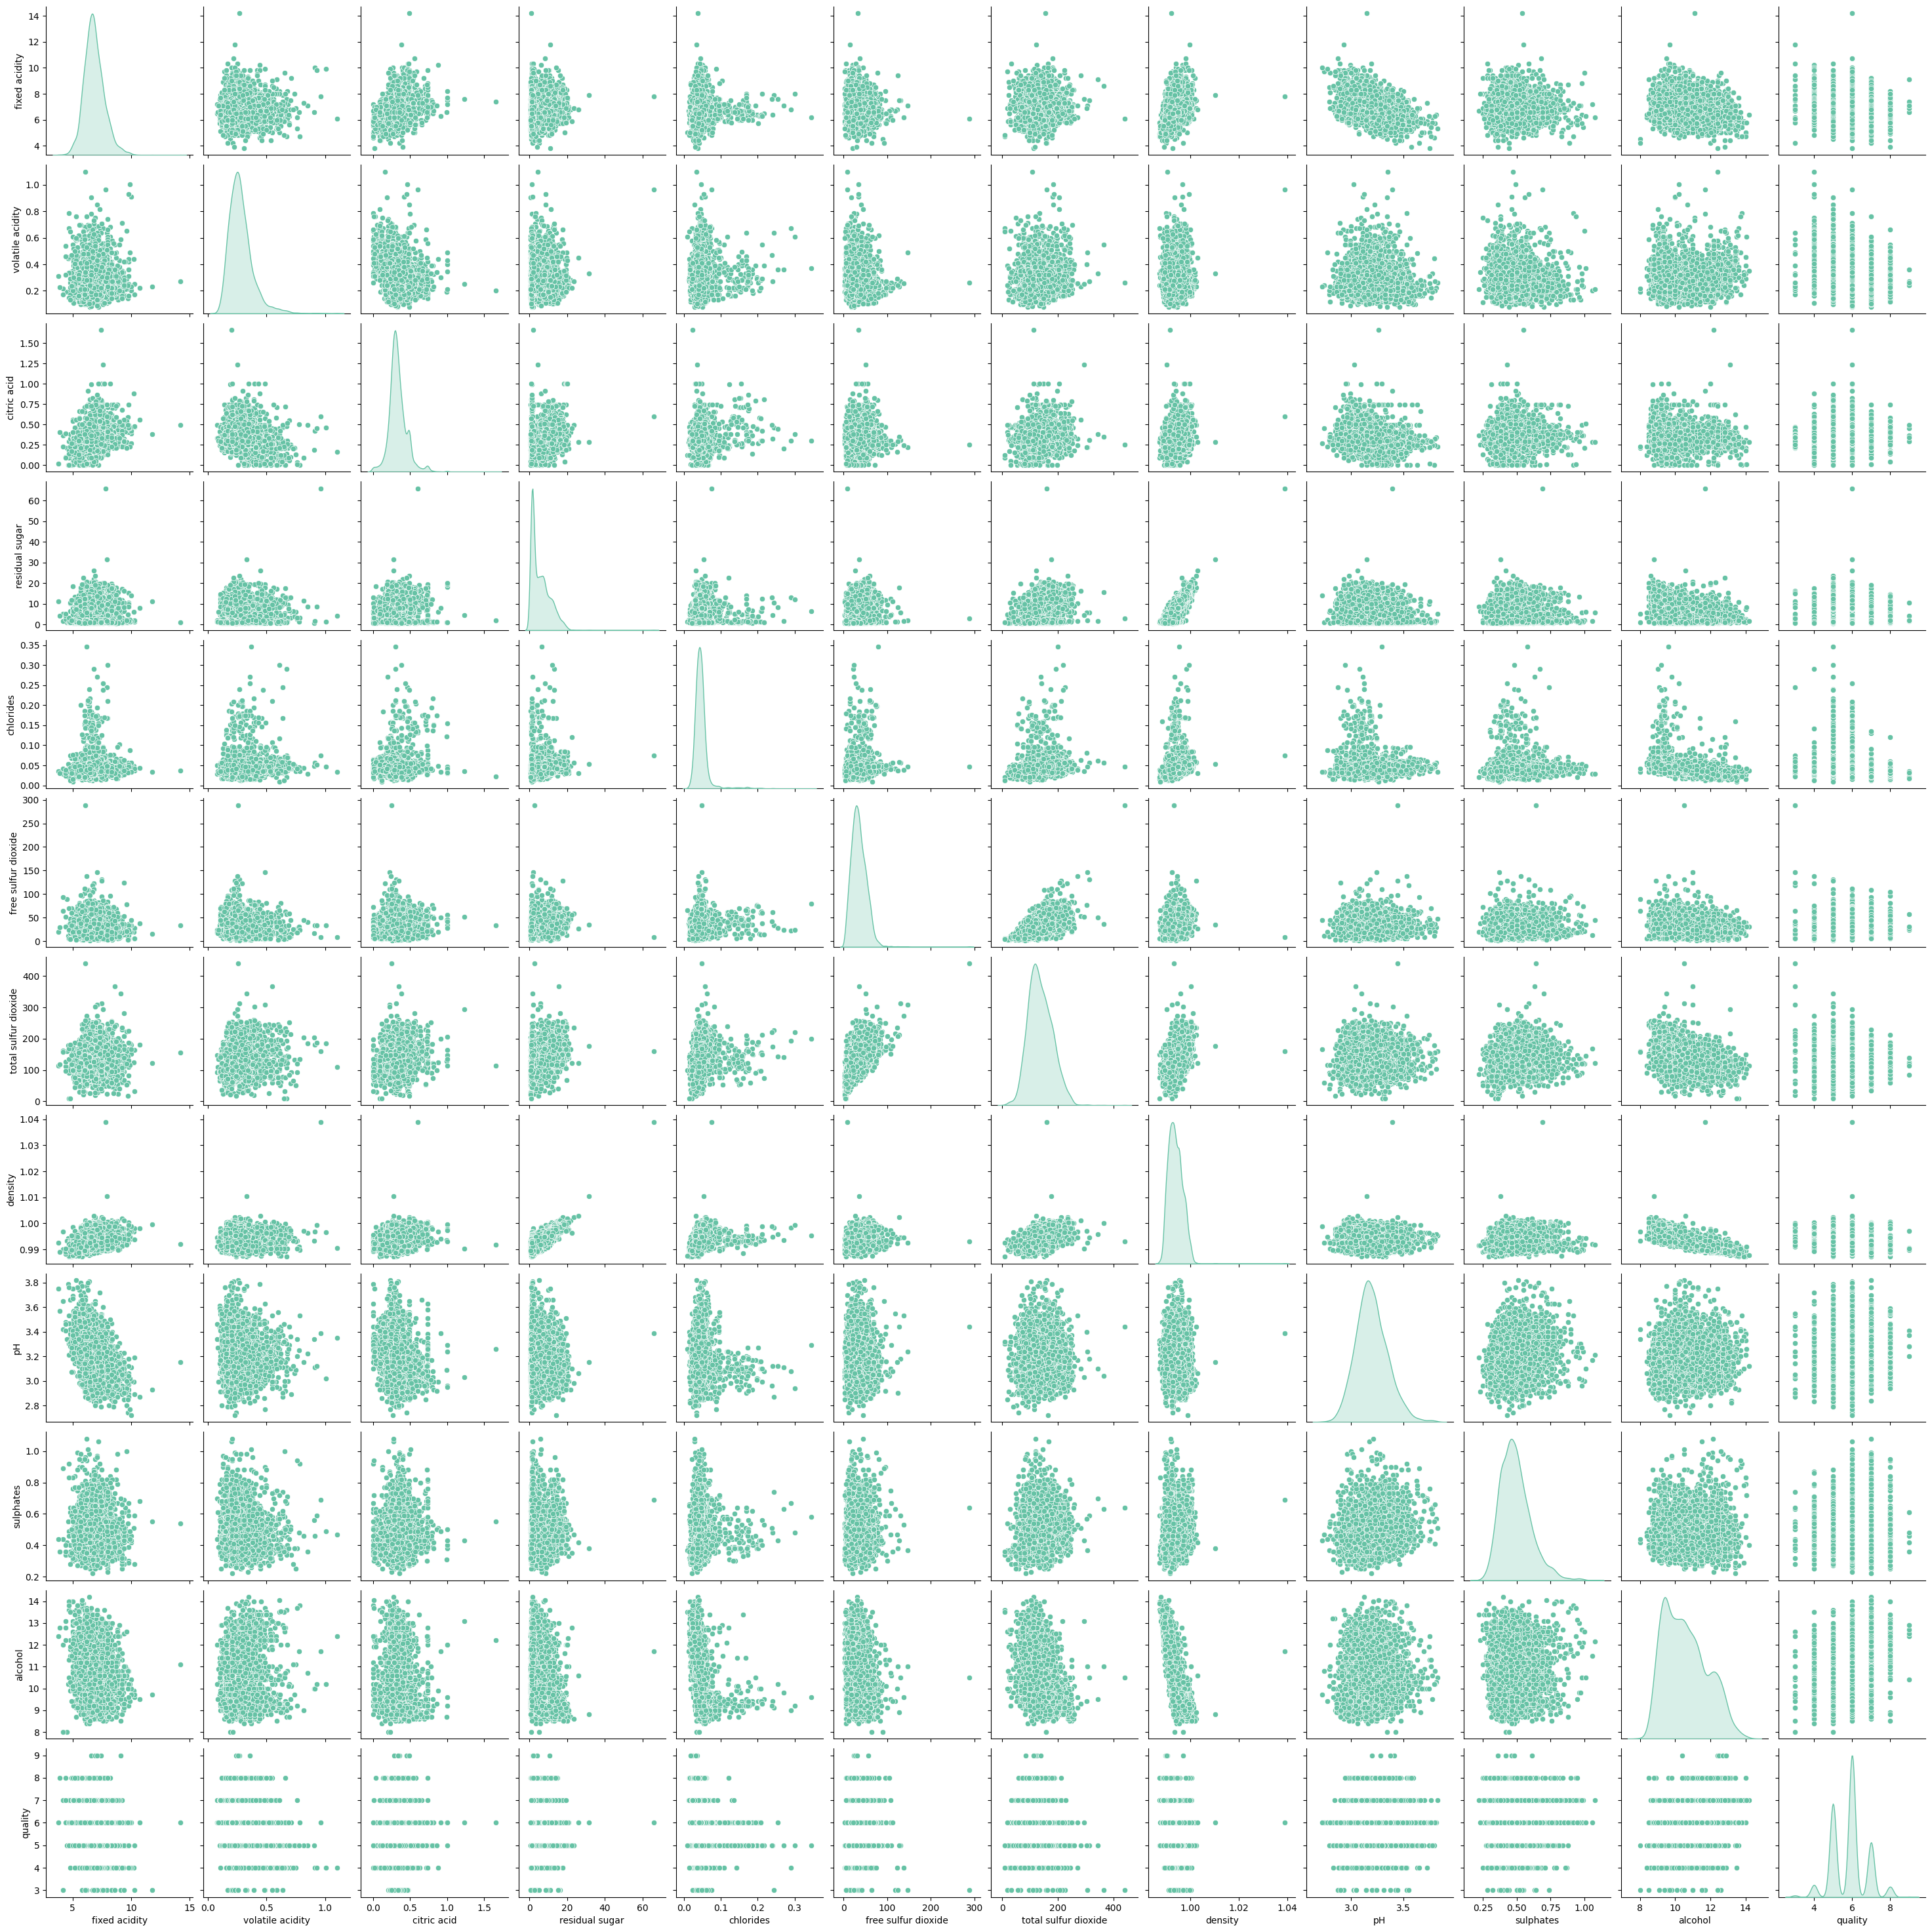

In [ ]:
# Visualize the numerical variables for 'white'
sns.pairplot(data=white, diag_kind = 'kde')

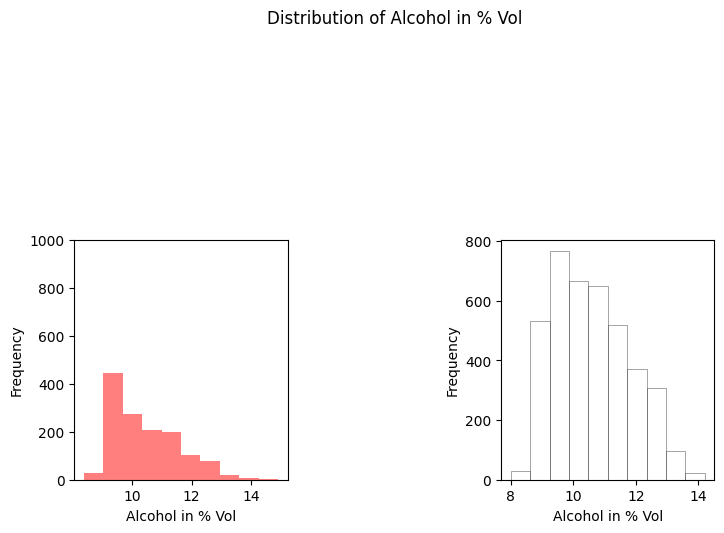

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

##**1f) Merge the two datasets**

In [ ]:
# Add a column to identify the wine type(white=0, red=1)
white['type'] = 0
red['type'] = 1

# Concatenate `red` and `white` DataFrames
wines = pd.concat([red, white], ignore_index=True)
wines.tail()

<ipython-input-17-f66eaef65694>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white['type'] = 0
<ipython-input-17-f66eaef65694>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red['type'] = 1


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  type  
5315     11.2        6     0  
5316      9.6        5     0  
5317      9.4        6     0  
5318     12.8        7     0  
5319     11.8        6     0

- **Correlation Matrix Analysis**

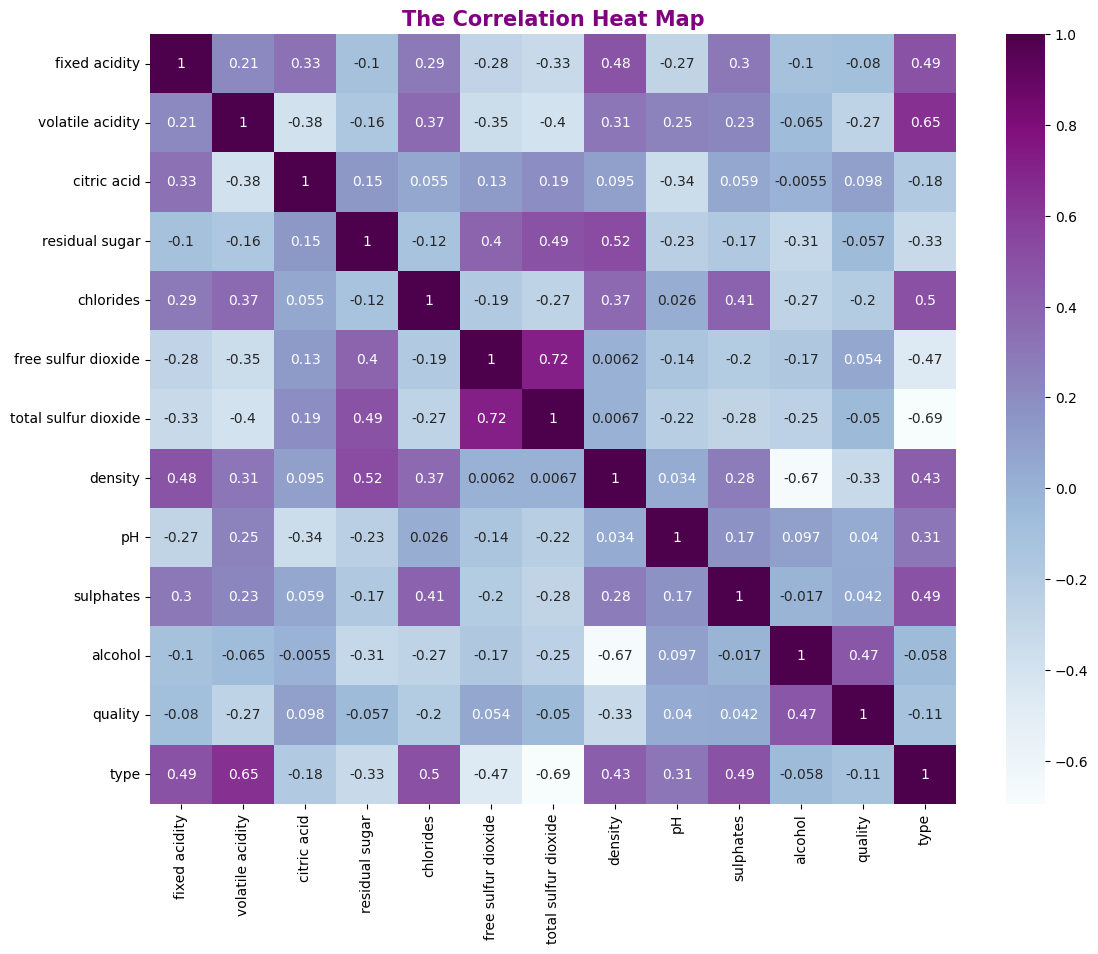

In [ ]:
# Show the correlations of all variables of wines in heatmap
plt.figure(figsize=(13,10))
sns.heatmap(wines.corr(),cmap="BuPu", annot=True)
plt.title("The Correlation Heat Map", size=15, color='purple',fontweight='bold')
plt.show()

- **Handle the Outliers of the dataset**

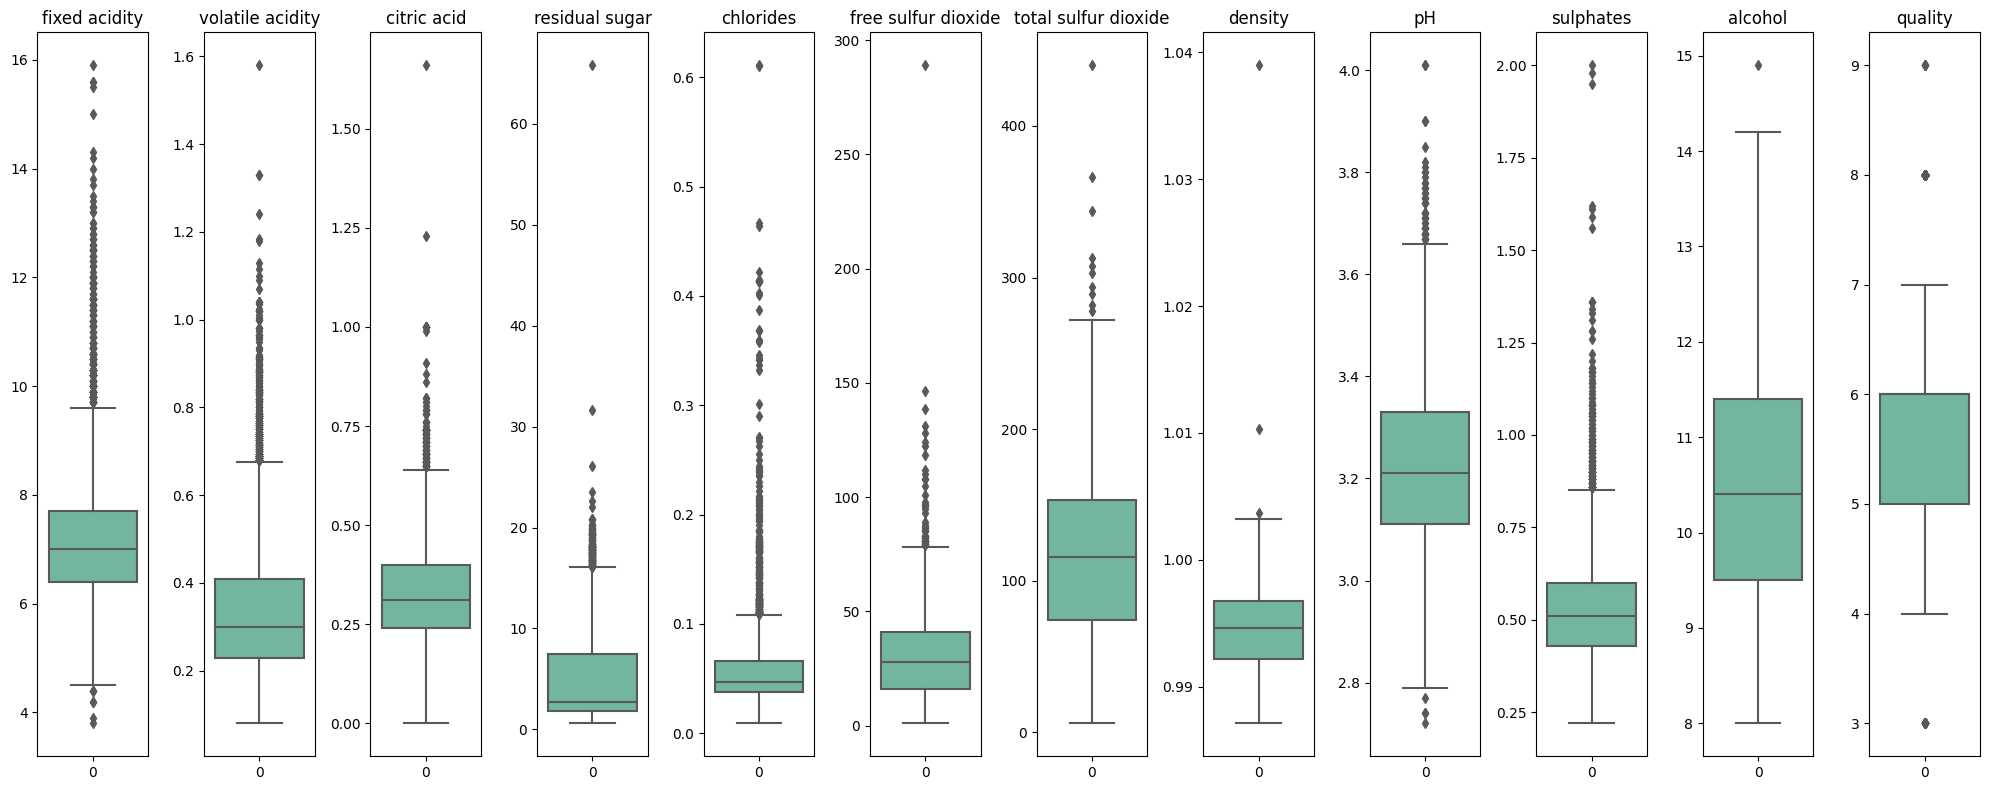

In [ ]:
# Outlier Analysis for the merged dataset
# List the columns to be included in the boxplot
columns_to_include = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
                      'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Create a boxplot for each specified column
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_include), figsize=(20, 8))

# Iterate over each specified column
for i, col in enumerate(columns_to_include): 
    sns.boxplot(wines[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Check the skewness for each column in the combined dataset (excluding 'type')
numeric_cols = [col for col in wines.select_dtypes(include=['number']).columns if col != 'type']

for col in numeric_cols:
    skewness = wines[col].skew()
    print("Skewness of {}: {}".format(col, skewness))

Skewness of fixed acidity: 1.6504171812404804
Skewness of volatile acidity: 1.5045572014481647
Skewness of citric acid: 0.48430902797982095
Skewness of residual sugar: 1.7065502704869113
Skewness of chlorides: 5.338236960791629
Skewness of free sulfur dioxide: 1.3627194619464467
Skewness of total sulfur dioxide: 0.06361443392014983
Skewness of density: 0.6663258197124551
Skewness of pH: 0.38996921434552967
Skewness of sulphates: 1.8094537738794463
Skewness of alcohol: 0.545695978384562
Skewness of quality: 0.1474673665121148


*Observation: The dataset exhibits relatively high skewness for several features.*

- **Clean the outliers of the merged dataset**

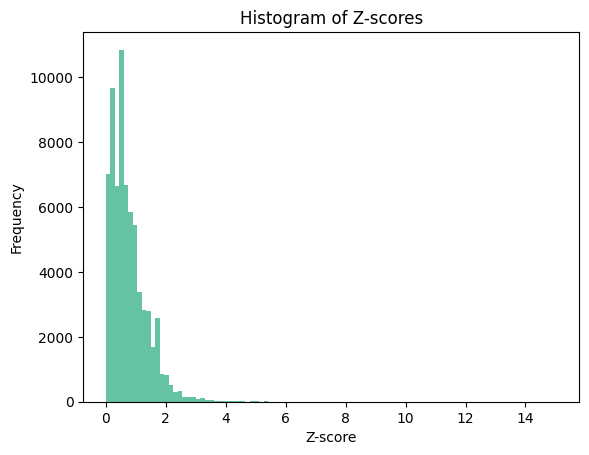

In [ ]:
from scipy import stats

# Calculate the Z-scores of all the columns in the DataFrame
z_scores = np.abs(stats.zscore(wines.values))

# Plot the histogram of Z-scores
plt.hist(z_scores.flatten(), bins=100)

# Add labels and title
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.title('Histogram of Z-scores')

plt.show()

In [ ]:
# Set minimum and maximum threshold values for the Z-scores
min_threshold = 3
max_threshold = 4

# Print the number of rows in the DataFrame before removing outliers
original_rows = wines.shape[0]
print('Number of rows BEFORE removing outliers                : {}'.format(original_rows))

# Find rows where z-scores are below the minimum threshold for all columns
outlier_mask_min = (z_scores < min_threshold).all(axis=1)

# Remove outliers using the minimum threshold value
filtered_data_min = wines[outlier_mask_min]

# Print the number of rows after removing outliers using the minimum threshold value
filtered_rows_min = filtered_data_min.shape[0]
print('Number of rows after removing outliers using 3 std dev : {}'.format(filtered_rows_min))

# Find rows where z-scores are below the maximum threshold for all columns
outlier_mask_max = (z_scores < max_threshold).all(axis=1)

# Remove outliers using the maximum threshold value
filtered_data_max = wines[outlier_mask_max]

# Print the number of rows after removing outliers using the maximum threshold value
filtered_rows_max = filtered_data_max.shape[0]
print('Number of rows after removing outliers using 4 std dev : {}'.format(filtered_rows_max))

# Calculate the number of rows within the range of minimum and maximum threshold
rows_within_range = abs(filtered_rows_min - filtered_rows_max)
print('Number of rows that are within std dev 3 to 4          : {}'.format(rows_within_range))

# Print the number of rows in the DataFrame after removing outliers
filtered_rows = filtered_data_min.shape[0]
print('Number of rows AFTER removing outliers                 : {}'.format(filtered_rows))

# Update the wine dataset
wines=wines[(z_scores < min_threshold).all(axis=1)]

Number of rows BEFORE removing outliers                : 5320
Number of rows after removing outliers using 3 std dev : 4869
Number of rows after removing outliers using 4 std dev : 5165
Number of rows that are within std dev 3 to 4          : 296
Number of rows AFTER removing outliers                 : 4869


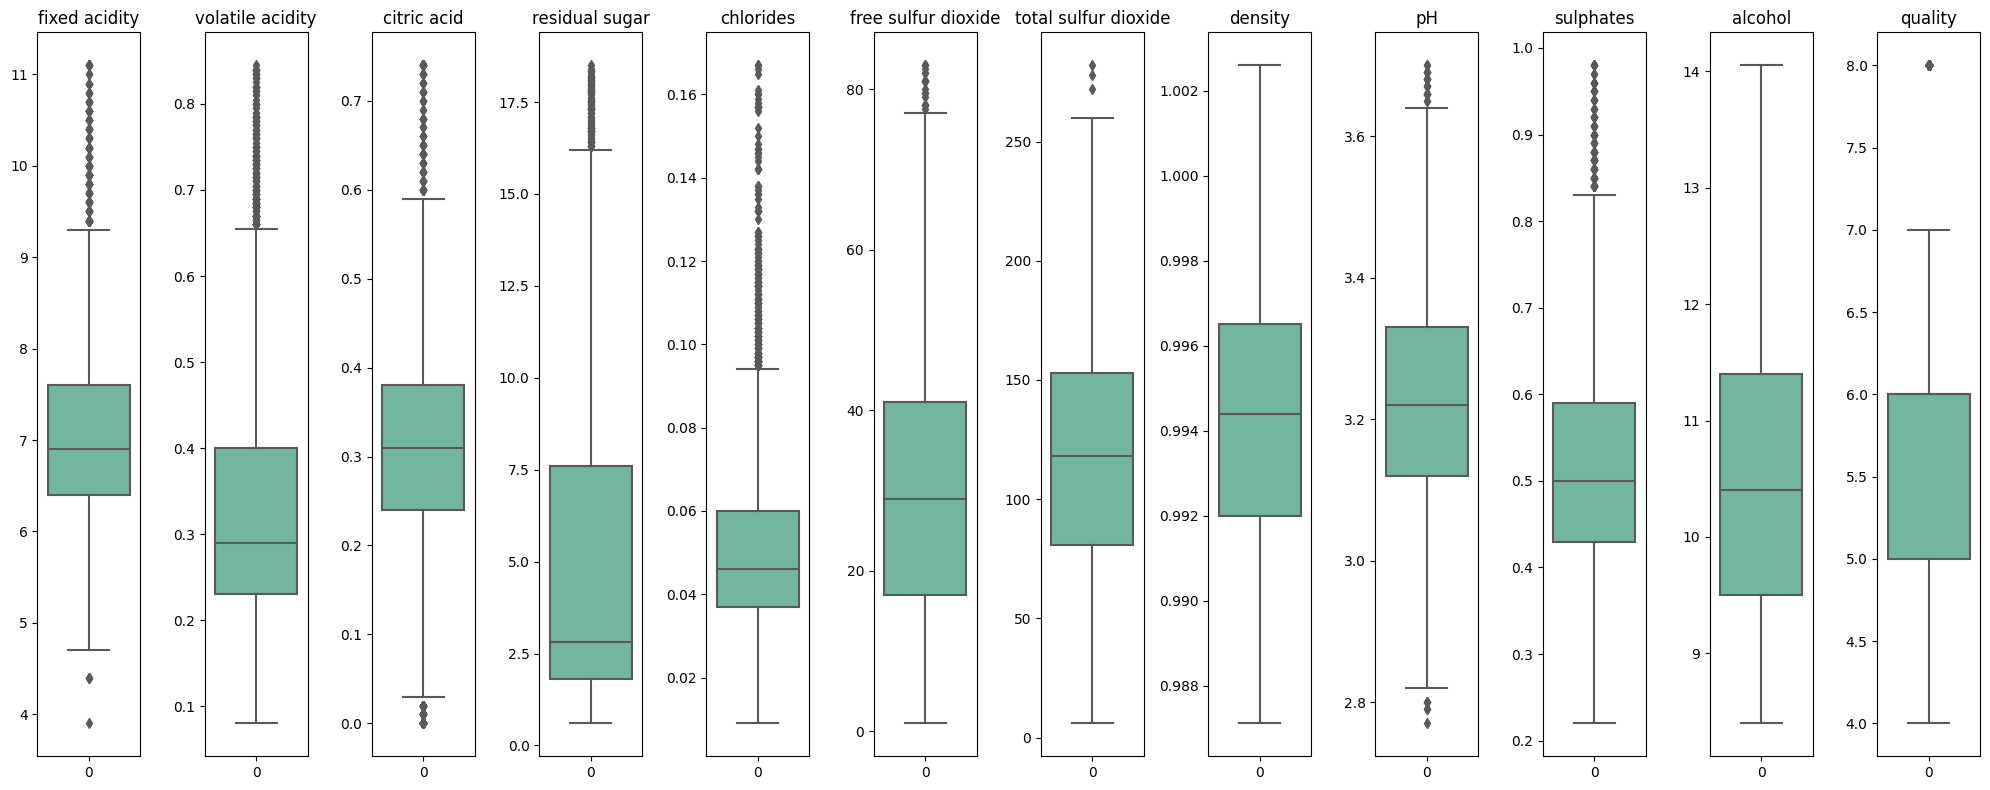

In [ ]:
# Check the modified dataset after cleaning the outliers

# List the columns to be included in the boxplot
columns_to_include = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
                      'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Create a boxplot for each specified column
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_include), figsize=(20, 8))

# Iterate over each specified column
for i, col in enumerate(columns_to_include): 
    sns.boxplot(wines[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Recheck the skewness of dataset 'wines'
for col in numeric_cols:
    skewness = wines[col].skew()
    print("Skewness of {}: {}".format(col, skewness))

Skewness of fixed acidity: 0.91252438053398
Skewness of volatile acidity: 1.1566285606329405
Skewness of citric acid: 0.08949402704061461
Skewness of residual sugar: 1.1573467722661965
Skewness of chlorides: 1.4857164536866048
Skewness of free sulfur dioxide: 0.48897525830005595
Skewness of total sulfur dioxide: -0.047011901716316584
Skewness of density: -0.020884765106332002
Skewness of pH: 0.1991019582726249
Skewness of sulphates: 0.7147809810122209
Skewness of alcohol: 0.5162669724815155
Skewness of quality: 0.2675200920251207


*Observation: After cleaning the outliers, the skewness values have changed for some features, suggesting a more balanced distribution.*

##**1g) Scale the dataset and Split the dataset into training, validation and testing sets for model evaluation.**

In [ ]:
from sklearn.utils import shuffle

# Shuffle the dataset
wines_shuffled = shuffle(wines, random_state=42)

# Take a look at the shuffled dataset
wines_shuffled.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4275            5.9             0.655         0.00             5.6      0.033   
1376            6.8             0.260         0.42             1.7      0.049   
1426            7.4             0.180         0.30             8.8      0.064   
4561            7.7             0.310         0.36             4.3      0.026   
2030            6.0             0.180         0.31             1.4      0.036   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4275                  8.0                  31.0  0.99360  3.32       0.51   
1376                 41.0                 122.0  0.99300  3.47       0.48   
1426                 26.0                 103.0  0.99610  2.94       0.56   
4561                 15.0                  87.0  0.99152  3.11       0.48   
2030                 14.0                  75.0  0.99085  3.34       0.58   

      alcohol  quality  type  
4275     10.5        4     0  
1376     10.5        8     0  
1426      9.3        5     0  
4561     12.0        5     0  
2030     11.1        8     0

In [ ]:
#  Scale the shuffled dataset
scaler = StandardScaler()
X = wines_shuffled.drop('type', axis=1)
y = wines_shuffled['type']
X = scaler.fit_transform(X)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Split the data up on train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (2726, 12)
Validation set shape: (1169, 12)
Testing set shape: (974, 12)


In [ ]:
y_test[0:10]

5049    0
5198    0
5203    0
3120    0
3946    0
3609    0
4874    0
3824    0
4711    0
4094    0
Name: type, dtype: int64

In [ ]:
#get merged dataset shape
wines.shape

(4869, 13)

# **2) Model Development**

- Design 5 different neural network architectures to be trained.
- Show the network architecture in figures. 
- Train the neural network models using the training dataset and evaluate the model with validation data. 
- Analyse the training and validation loss curve and report your observations and analysis.

##**2a) Design 5 different neural network architectures to be trained**

In [ ]:
# Check the number of features in the X_train dataset
X_train.shape[1]

12

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Define the hyperparameters
learning_rate = 0.001
batch_size = 32

# Model architectures
models = []

# Model development
# Model 1 - Simple model 
model1 = Sequential()
model1.add(Dense(1, input_shape=(12,), activation='sigmoid'))
models.append(model1)

# Model 2 - Increase model complexity (1 hidden layer)
model2 = Sequential()
model2.add(Dense(8, input_shape=(12,), activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
models.append(model2)

# Model 3 - Further increase model complexity (2 hidden layers)
model3 = Sequential()
model3.add(Dense(16, input_shape=(12,), activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
models.append(model3)

# Model 4 - Use different activation function - Hyperbolic Tangent (tanh)
model4 = Sequential()
model4.add(Dense(16, input_shape=(12,), activation='tanh'))
model4.add(Dense(8, activation='tanh'))
model4.add(Dense(1, activation='sigmoid'))
models.append(model4)

# Model 5 - Highly increase model complexity
model5 = Sequential()
model5.add(Dense(64, input_shape=(12,), activation='relu'))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(16, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
models.append(model5)


In [ ]:
# Create dataframe to record the results of models for comparision 
compare_table = pd.DataFrame(columns=["Model","Val_Loss","Val_Accuracy","Precision","Recall","F1 Score","R2 Score"])

##**2b) Train the neural network models using the training dataset and evaluate the model with validation data**

Model 1 evaluation:
Epoch 1/40
86/86 [==============================] - 1s 4ms/step - loss: 0.8453 - accuracy: 0.5323 - val_loss: 0.7562 - val_accuracy: 0.5740
Epoch 2/40
86/86 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.6178 - val_loss: 0.6146 - val_accuracy: 0.6501
Epoch 3/40
86/86 [==============================] - 0s 3ms/step - loss: 0.5644 - accuracy: 0.6933 - val_loss: 0.5076 - val_accuracy: 0.7288
Epoch 4/40
86/86 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.7634 - val_loss: 0.4276 - val_accuracy: 0.8109
Epoch 5/40
86/86 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8247 - val_loss: 0.3667 - val_accuracy: 0.8691
Epoch 6/40
86/86 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8808 - val_loss: 0.3215 - val_accuracy: 0.9008
Epoch 7/40
86/86 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.9087 - val_loss: 0.2857 - val_accuracy: 0.9247


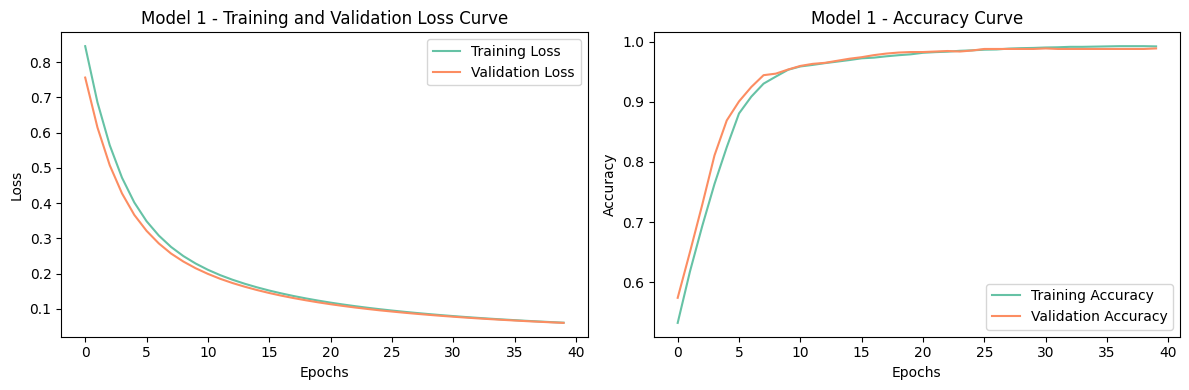

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
Model 2 evaluation:
Epoch 1/40
86/86 [==============================] - 1s 4ms/step - loss: 0.6501 - accuracy: 0.6669 - val_loss: 0.4734 - val_accuracy: 0.7896
Epoch 2/40
86/86 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8360 - val_loss: 0.3190 - val_accuracy: 0.8854
Epoch 3/40
86/86 [==============================] - 0s 3ms/step - loss: 0.2813 - accuracy: 0.9131 - val_loss: 0.2344 - val_accuracy: 0.9273
Epoch 4/40
86/86 [==============================] - 0s 3ms/step - loss: 0.2109 - accuracy: 0.9431 - val_loss: 0.1777 - val_accuracy: 0.9598
Epoch 5/

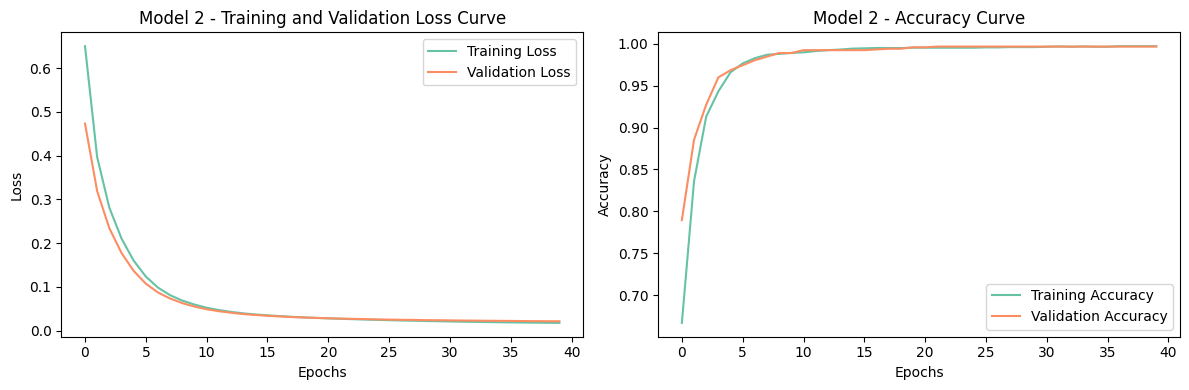

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
Model 3 evaluation:
Epoch 1/40
86/86 [==============================] - 1s 4ms/step - loss: 0.5624 - accuracy: 0.7032 - val_loss: 0.3973 - val_accuracy: 0.8400
Epoch 2/40
86/86 [==============================] - 0s 3ms/step - loss: 0.2718 - accuracy: 0.9365 - val_loss: 0.1690 - val_accuracy: 0.9752
Epoch 3/40
86/86 [==============================] - 0s 3ms/step - loss: 0.1135 - accuracy: 0.9828 - val_loss: 0.0728 - val_accuracy: 0.9846
Epoch 4/40
8

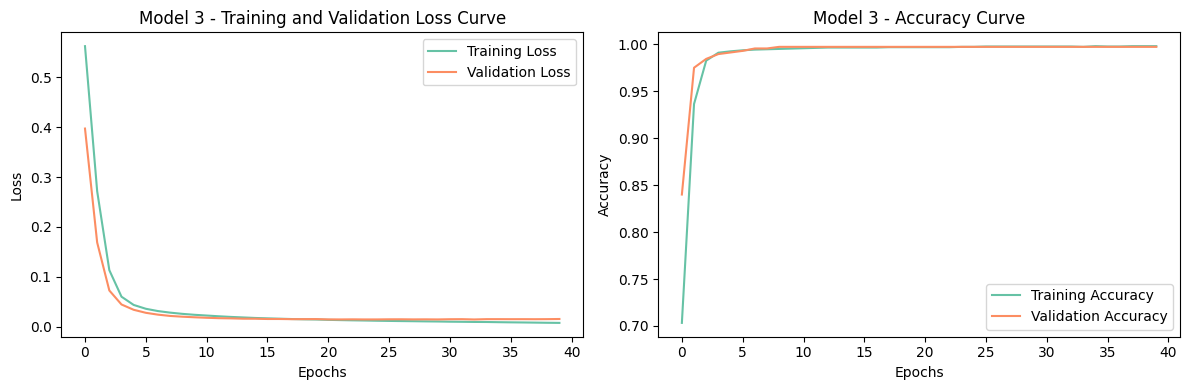

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                208       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Model 4 evaluation:
Epoch 1/40
86/86 [==============================] - 1s 4ms/step - loss: 0.2949 - accuracy: 0.9127 - val_loss: 0.1804 - val_accuracy: 0.9521
Epoch 2/40
86/86 [==============================] - 0s 3ms/step - loss: 0.1371 - accuracy: 0.9674 - val_loss: 0.1006 - val_accuracy: 0.9752
Epoch 3/40
86/86 [==

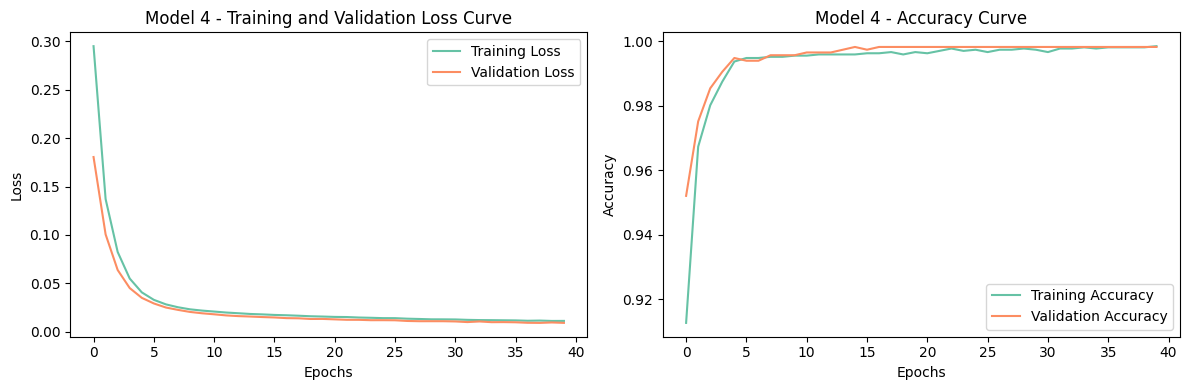

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                208       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Model 5 evaluation:
Epoch 1/40
86/86 [==============================] - 1s 5ms/step - loss: 0.1883 - accuracy: 0.9670 - val_loss: 0.0331 - val_accuracy: 0.9932
Epoch 2/40
86/86 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9930 - val_loss: 0.0188 - val_accuracy: 0.9966
Epoch 3/40
86/86 [==

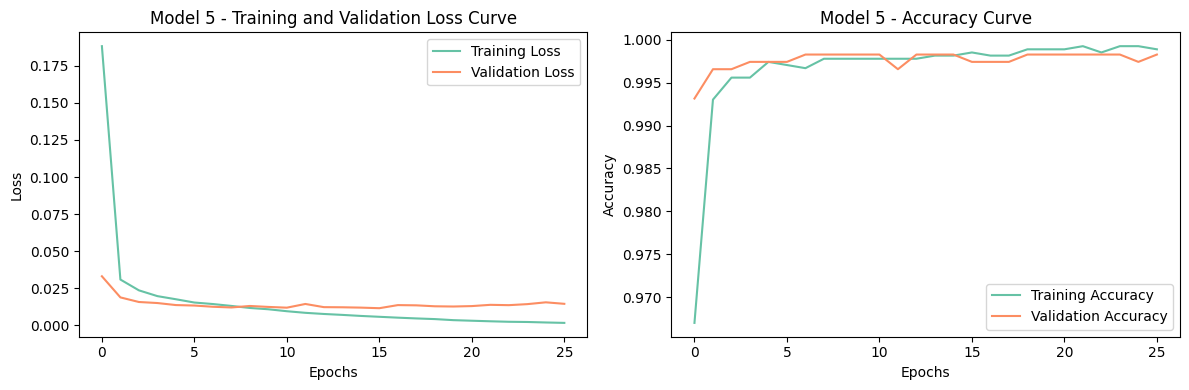

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                832       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score, r2_score,precision_score, recall_score


for i, model in enumerate(models):
    print(f"Model {i+1} evaluation:")
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=40, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Print validation loss and accuracy
    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Calculate precision and recall
    y_pred = model.predict(X_val)
    y_pred = (y_pred > 0.5).astype(int)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)

    # Calculate F1 score
    y_pred = model.predict(X_val)
    y_pred = (y_pred > 0.5).astype(int)
    f1 = f1_score(y_val, y_pred)

    # Calculate R2 score
    r2 = r2_score(y_val, y_pred)

    # Add the results into the compare table to be displayed later
    new_row = {"Model": f"Model {i+1}","Val_Loss":val_loss,"Val_Accuracy":val_accuracy,"Precision": precision, "Recall": recall, "F1 Score": f1, "R2 Score": r2}
    compare_table = pd.concat([compare_table, pd.DataFrame(new_row, index=[0])], ignore_index=True)

    # Plot the training and validation loss curves for each model
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f"Model {i+1} - Training and Validation Loss Curve")

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label="Training Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f"Model {i+1} - Accuracy Curve")

    plt.tight_layout()
    plt.show()

    model.summary()

##**2c) Model Visualization**

In [ ]:
# Show dataframe for comparision
display(compare_table.style
        .set_properties(**{'text-align':'left'})
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}]))

-The five model architectures above share the same:

    Learning rate = 0.001
    Optimizer = Adam
    Batch size = 32
    Epochs = 40

-The differences between the model architectures are:

    1. Number of hidden layers
    2. Types of activation function used: 
        - Hyperbolic tangent(tanh) 
        - Rectified Linear Unit (relu)
        - sigmoid

## **2d) Show the network architecture in figures**     &    **2e) Analyse the training and validation loss curve and report the observations and analysis.**

**[ MODEL 1 ]**

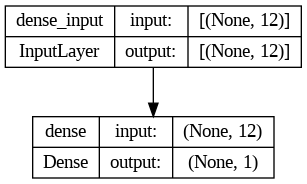

In [ ]:
import pydot
from IPython.display import Image

# Show the network architecture of Model 1 in figure
def plot_model(model, to_file):
    dot = tf.keras.utils.model_to_dot(model, show_shapes=True, show_layer_names=True)
    image = dot.create(prog='dot', format='png')
    with open(to_file, 'wb') as f:
        f.write(image)

plot_model(model1, to_file='model_plot_1.png')
Image(filename='model_plot_1.png')


*Based on the train and validation loss curve observed in the graph above, Model 1 is considered performing well.*

*This model does not have hidden layer. It consists of a single dense layer with 1 output unit and sigmoid activation. It may not have enough complexity to capture the underlying patterns and relationships in the data. Thus, it may underfit the data and have limited predictive power compared to other more complex models.*

**[ MODEL 2 ]**

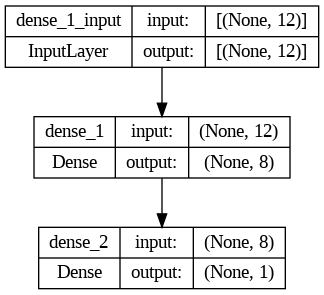

In [ ]:
# Show the network architecture of Model 2 in figure
def plot_model(model, to_file):
    dot = tf.keras.utils.model_to_dot(model, show_shapes=True, show_layer_names=True)
    image = dot.create(prog='dot', format='png')
    with open(to_file, 'wb') as f:
        f.write(image)
        
plot_model(model2, to_file='model_plot_2.png')
Image(filename='model_plot_2.png')

*Based on the training and validation loss curve observed in the graph above, Model 2 has better performance than Model 1.*

*The first layer is a hidden layer with 8 nodes, employing the rectified linear unit (ReLU) activation function. The second layer is the output layer with 1 node and sigmoid activation. The addition of the hidden layer in Model 2 allows for the extraction of higher-level features and introduces non-linear transformations to the input data.*

*The improved performance of Model 2, as indicated by the training and validation loss curves, suggests that the added complexity and appropriate activation function contribute to better capturing the patterns in the data.*

**[ MODEL 3 ]**

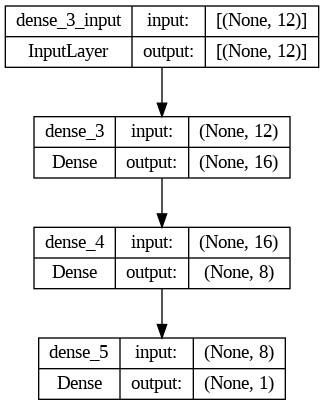

In [ ]:
# Show the network architecture of Model 3 in figure
def plot_model(model, to_file):
    dot = tf.keras.utils.model_to_dot(model, show_shapes=True, show_layer_names=True)
    image = dot.create(prog='dot', format='png')
    with open(to_file, 'wb') as f:
        f.write(image)
        
plot_model(model3, to_file='model_plot_3.png')
Image(filename='model_plot_3.png')

*Based on the validation and loss curve which is observed from the graph above, the training loss and validation loss for Model 3 merge together from epochs 10 to 40, with the validation loss line ending up slightly higher than the training loss line, it suggests that Model 3 is exhibiting a relatively good fit to the data.*

*The slight increase in the validation loss compared to the training loss may indicate a minor degree of overfitting, the overall performance of the model remains acceptable.*

*The first layer is a hidden layer with 16 nodes, using ReLU activation. This layer helps to extract higher-level features and introduces non-linear transformations to the input data. The second layer is also a hidden layer, with 8 nodes and ReLU activation. It further enhances the model's capacity to learn intricate relationships and patterns within the data.Finally, Model 3 concludes with an output layer consisting of 1 node and sigmoid activations.*

*The increasing number of nodes in the hidden layers, along with the addition of an extra hidden layer, allows Model 3 to capture even more complex relationships in the data compared to Model 2.By adding more layers and nodes, Model 3 offers increased flexibility and expressiveness, potentially leading to improved performance and predictive power.*


**[ MODEL 4 ]**

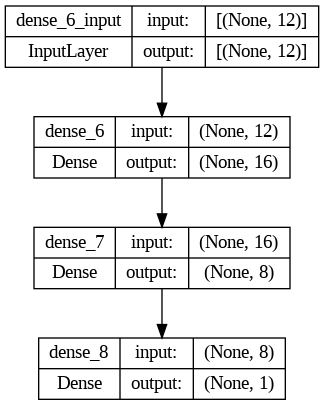

In [ ]:
# Show the network architecture of Model 4 in figure
def plot_model(model, to_file):
    dot = tf.keras.utils.model_to_dot(model, show_shapes=True, show_layer_names=True)
    image = dot.create(prog='dot', format='png')
    with open(to_file, 'wb') as f:
        f.write(image)
        
plot_model(model4, to_file='model_plot_4.png')
Image(filename='model_plot_4.png')

*Based on the validation and loss curve which observed above, both the training and validation loss curves for Model 4 demonstrate great performance.*

*Model 4 is constructed with two hidden layers. The first hidden layer consists of 16 nodes and utilizes the hyperbolic tangent (tanh) activation function. The second hidden layer has 8 nodes and also employs the tanh activation function. The key difference between Model 4 and Model 3 lies in the choice of activation function.*

*The convergence of the training and validation loss curves, with minimal crossing over, indicates that Model 4 is effectively capturing the underlying patterns and relationships in the data. The close proximity of the loss curves suggests that the model generalizes well to unseen data.*

The observation that the curves for training and validation loss converge closely together, without significant crossing over, suggests that the tanh activation function is well-suited for this dataset. The tanh function provides a smooth, symmetric activation that can capture both positive and negative relationships in the data.

Considering the performance and convergence of the loss curves, Model 4 appears to be a suitable choice. Its consistent performance across epochs, without signs of overfitting, indicates its robustness in capturing and generalizing patterns in the data.


**[ MODEL 5 ]**

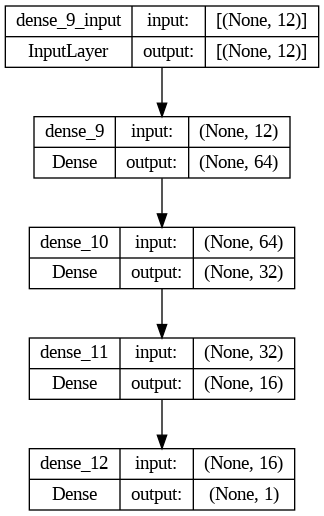

In [ ]:
# Show the network architecture of Model 5 in figure
def plot_model(model, to_file):
    dot = tf.keras.utils.model_to_dot(model, show_shapes=True, show_layer_names=True)
    image = dot.create(prog='dot', format='png')
    with open(to_file, 'wb') as f:
        f.write(image)
        
plot_model(model5, to_file='model_plot_5.png')
Image(filename='model_plot_5.png')

*Based on the validation and loss curve which is observed above, the training and validation loss curve are both slightly uneven. The validation loss curve remains horizontal while the training loss curve continue to decreases. Model 5 demonstrates overfitting, as indicated by the crossing over of the validation loss and training loss lines, followed by the increasing validation loss.*

*This may due to the high complexity of Model 5, as it has 3 hidden layers, hidden layer 1 with 64 nodes, hidden layer 2 with 32 nodes and hidden layer 3 with 16 nodes, and all these 3 hidden layers used relu activation.The last layer is the output layer with 1 node and sigmoid activation.*

The increasing gap between the training and validation loss indicates that the model is fitting the training data very well, but it fails to generalize to unseen data represented by the validation set. The continuous decrease in the training loss suggests that the model is memorizing the training data, including potential noise or outliers, which results in poor performance on new data.

The high complexity of Model 5, characterized by a large number of layers and nodes, may contribute to the overfitting. With more parameters to learn, the model becomes more prone to overfitting, especially when the training data is limited.

#**3) Model Tuning**

- Choose the best model architecture based on Step 2 and perform hyperparameter tuning. 
- Justify the reason on how you decide the best model. 
- Identify the hyperparameters you wish to tune (e.g activation function, learning rate, optimizer etc). 
- Perform a systematic analysis to analyse the performance of the identified model with different hyperparameters. 
- Report your results in a table.

##**3a) Choose the best model architecture based on Step 2**

Model 4 is the best model architecture.

##**3b) Reasons of choosing it as the best model**

In [ ]:
# Show dataframe for comparision
display(compare_table)

Model  Val_Loss  Val_Accuracy  Precision    Recall  F1 Score  R2 Score
0  Model 1  0.060252      0.988879   0.966667  0.984906  0.975701  0.936563
1  Model 2  0.021746      0.996578   0.996198  0.988679  0.992424  0.980481
2  Model 3  0.015625      0.997434   1.000000  0.988679  0.994307  0.985361
3  Model 4  0.009280      0.998289   1.000000  0.992453  0.996212  0.990240
4  Model 5  0.011539      0.997434   0.996212  0.992453  0.994329  0.985361

 Model 4 has the lowest validation loss (0.009280) and the highest validation accuracy (0.998289). Additionally, it has a precision of 1.000000, recall of 0.992453, F1 score of 0.996212, and R2 score of 0.990240. These metrics indicate that Model 4 performs well across multiple evaluation criteria.

Therefore, based on the provided results, **Model 4** can be considered as the best model.

##**3c) The Hyperparameters that I Wish to Tune:**



```
learning_rates = [0.01, 0.1]
batch_sizes = [32, 64, 128]
activation_functions = ['relu', 'sigmoid', 'tanh']
optimizers = ['adam', 'rmsprop']

```




##**3d) Perform hyperparameter tuning** & **3e) Report the results in a Table**

In [ ]:
# Define the hyperparameters for tuning
learning_rates = [0.01, 0.1]
batch_sizes = [32, 64, 128]
activation_functions = ['relu', 'sigmoid', 'tanh']
optimizer_options = ['adam', 'rmsprop']
epochs = 40

# Track the best performance
best_accuracy = 0.0
best_model = None

# Create a table to store the results
results_table = pd.DataFrame(columns=['Learning Rate', 'Batch Size', 'Activation Function', 'Optimizer', 'Validation Accuracy'])

# Perform hyperparameter tuning
for lr in learning_rates:
    for bs in batch_sizes:
        for activation in activation_functions:
            for optimizer_option in optimizer_options:
                # Clear previous model's session and build a new model
                tf.keras.backend.clear_session()
                model = Sequential()
                model.add(Dense(16, input_shape=(12,), activation='tanh'))
                model.add(Dense(8, activation='tanh'))
                model.add(Dense(1, activation=activation))

                # Compile the model with current hyperparameters
                optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
                model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

                # Train the model
                early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
                history = model.fit(X_train, y_train, epochs=epochs, batch_size=bs, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

                # Evaluate the model on the validation set
                val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

                # Check if the current model is the best so far
                if val_accuracy > best_accuracy:
                    best_accuracy = val_accuracy
                    best_model = model

                # Store the results in the table
                results_table = results_table.append({'Learning Rate': lr, 'Batch Size': bs, 'Activation Function': activation, 'Optimizer': optimizer_option, 'Validation Accuracy': val_accuracy}, ignore_index=True)

<ipython-input-48-5cb6f2e23807>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Learning Rate': lr, 'Batch Size': bs, 'Activation Function': activation, 'Optimizer': opt, 'Validation Accuracy': val_accuracy}, ignore_index=True)
<ipython-input-48-5cb6f2e23807>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Learning Rate': lr, 'Batch Size': bs, 'Activation Function': activation, 'Optimizer': opt, 'Validation Accuracy': val_accuracy}, ignore_index=True)
<ipython-input-48-5cb6f2e23807>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Learning Rate': lr, 'Batch Size': bs, 'Activation Function': activation, '

Learning Rate Batch Size Activation Function Optimizer  \
0            0.01         32                relu      adam   
1            0.01         32                relu   rmsprop   
2            0.01         32             sigmoid      adam   
3            0.01         32             sigmoid   rmsprop   
4            0.01         32                tanh      adam   
5            0.01         32                tanh   rmsprop   
6            0.01         64                relu      adam   
7            0.01         64                relu   rmsprop   
8            0.01         64             sigmoid      adam   
9            0.01         64             sigmoid   rmsprop   
10           0.01         64                tanh      adam   
11           0.01         64                tanh   rmsprop   
12           0.01        128                relu      adam   
13           0.01        128                relu   rmsprop   
14           0.01        128             sigmoid      adam   
15           0.01        128             sigmoid   rmsprop   
16           0.01        128                tanh      adam   
17           0.01        128                tanh   rmsprop   
18           0.10         32                relu      adam   
19           0.10         32                relu   rmsprop   
20           0.10         32             sigmoid      adam   
21           0.10         32             sigmoid   rmsprop   
22           0.10         32                tanh      adam   
23           0.10         32                tanh   rmsprop   
24           0.10         64                relu      adam   
25           0.10         64                relu   rmsprop   
26           0.10         64             sigmoid      adam   
27           0.10         64             sigmoid   rmsprop   
28           0.10         64                tanh      adam   
29           0.10         64                tanh   rmsprop   
30           0.10        128                relu      adam   
31           0.10        128                relu   rmsprop   
32           0.10        128             sigmoid      adam   
33           0.10        128             sigmoid   rmsprop   
34           0.10        128                tanh      adam   
35           0.10        128                tanh   rmsprop   

    Validation Accuracy  
0              0.997434  
1              0.995723  
2              0.997434  
3              0.994867  
4              0.999145  
5              0.999145  
6              0.997434  
7              0.997434  
8              0.998289  
9              0.999145  
10             0.999145  
11             0.997434  
12             0.998289  
13             0.998289  
14             0.999145  
15             0.996578  
16             0.995723  
17             0.998289  
18             0.990590  
19             0.993157  
20             0.995723  
21             0.997434  
22             0.993157  
23             0.991446  
24             0.993157  
25             0.991446  
26             0.997434  
27             0.999145  
28             0.990590  
29             0.995723  
30             0.982891  
31             0.994012  
32             0.997434  
33             0.997434  
34             0.999145  
35             0.997434

In [ ]:
#Show the best performance among the models
print("Best Accuracy: ", best_accuracy)

Best Accuracy:  0.9991445541381836


In [ ]:
# Print the best model's hyperparameters and performance
print("Best Model Hyperparameters:")
print(f"Activation: {best_model.layers[0].activation.__name__}")
print(f"Neurons: {best_model.layers[0].units}")
print(f"Optimizer: {best_model.optimizer.__class__.__name__}")
print(f"Accuracy: {best_accuracy}")

Best Model Hyperparameters:
Activation: tanh
Neurons: 16
Optimizer: Adam
Accuracy: 0.9991445541381836


# **4) Model Evaluation**

- Using the best model that you have identified in Step 3, evaluate its
performance on testing data. 
- Compare your validation and testing results using appropriate
evaluation metrics. 
- Report your observation and discuss the results.

##**4a) Identify the Best Model identified in Step 3:**

The highest accuracy among the models above is 0.999145. There are a few  models having the same accuracy (0.999145), so I will choose one from them randomly. After tuning the hyperparameters which are learning rate, batch size, activation function and optimizer above, based on the accuracy , we can observe that the model with:

    Learning rate= 0.01
    Batch size = 32
    Activation function = tanh
    Optimizer = Adam

has the highest validation accuracy, which is 0.999145.

I will create and compile the chosen model architecture with the identified hyperparameters and evaluate its performance using the validation and testing datasets. 

The validation and the testing accuracy will be shown.

##**4b) Evaluate the performance of the best model on testing data**

In [ ]:
# Select the hyperparameters for the best model
best_learning_rate = 0.01
best_batch_size = 32
best_activation_function = 'tanh'
best_optimizer = tf.keras.optimizers.Adam(learning_rate=best_learning_rate)

# Build and compile the best model
best_model = Sequential()
best_model.add(Dense(16, input_shape=(12,), activation='tanh'))
best_model.add(Dense(8, activation='tanh'))
best_model.add(Dense(1, activation=best_activation_function))
best_model.compile(loss='binary_crossentropy', optimizer=best_optimizer, metrics=['accuracy'])

# Train the best model
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
best_model.fit(X_train, y_train, epochs=40, batch_size=best_batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

# Evaluate the best model on the validation and testing data
val_loss, val_accuracy = best_model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)

# Print the validation and testing results
print("Validation Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)

Validation Accuracy: 0.9974337220191956
Testing Accuracy: 0.9938398599624634


##**4c) Compare the Validation and Testing Results**

In [ ]:
result_table = pd.DataFrame(columns=["", "Loss", "Accuracy", "Precision", "Recall", "F1_Score","R2_Score"])

# Calculate validation metrics
y_pred_val = best_model.predict(X_val)
y_pred_val = (y_pred_val > 0.5).astype(int)

val_loss, val_accuracy = best_model.evaluate(X_val, y_val, verbose=0)
val_precision = precision_score(y_val, y_pred_val)
val_recall = recall_score(y_val, y_pred_val)
val_f1_score = f1_score(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

# Calculate testing metrics
y_pred_test = best_model.predict(X_test)
y_pred_test = (y_pred_test > 0.5).astype(int)

test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

result_table = result_table.append({"": "Validation",
                                    "Loss": val_loss,
                                    "Accuracy": val_accuracy,
                                    "Precision": val_precision,
                                    "Recall": val_recall,
                                    "F1_Score": val_f1_score,
                                    "R2_Score": val_r2},
                                   ignore_index=True)

result_table = result_table.append({"": "Testing",
                                    "Loss": test_loss,
                                    "Accuracy": test_accuracy,
                                    "Precision": test_precision,
                                    "Recall": test_recall,
                                    "F1_Score": test_f1_score,
                                    "R2_Score": test_r2},
                                   ignore_index=True)

display(result_table.style.set_properties(**{'text-align': 'left'})
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}]))


31/31 [==============================] - 0s 1ms/step


<ipython-input-56-34ff06208d30>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({"": "Validation",
<ipython-input-56-34ff06208d30>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({"": "Testing",


 - **To Visualize the Results Using a Confusion Matrix:**

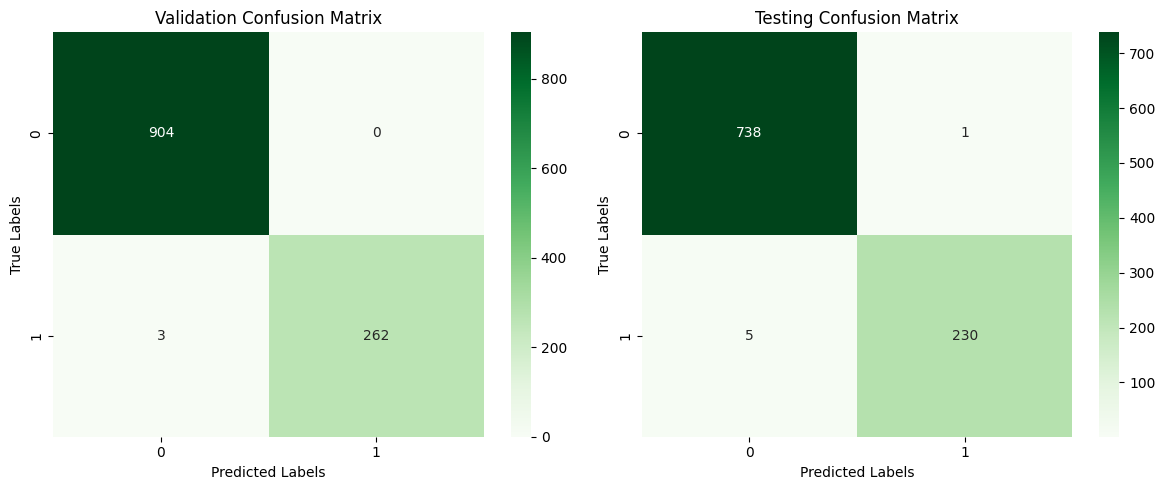

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix for validation data
cm_val = confusion_matrix(y_val, y_pred_val)

# Calculate the confusion matrix for testing data
cm_test = confusion_matrix(y_test, y_pred_test)

# Create a figure with two subplots for validation and testing confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the validation confusion matrix
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Greens", ax=axes[0])
axes[0].set_title('Validation Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot the testing confusion matrix
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title('Testing Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

- **Plot the Precision-Recall curve based on the predictions and true labels from the model:**

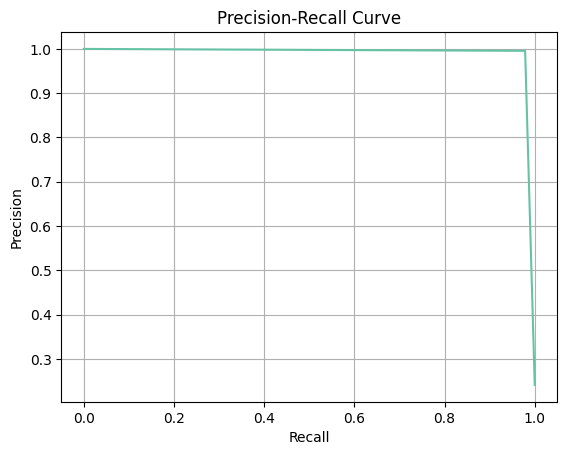

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Calculate the precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test)

# Plot the Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


- **Calculate and display the AUC (Area Under the ROC Curve) using the predictions and true labels from the best model:**

31/31 [==============================] - 0s 1ms/step


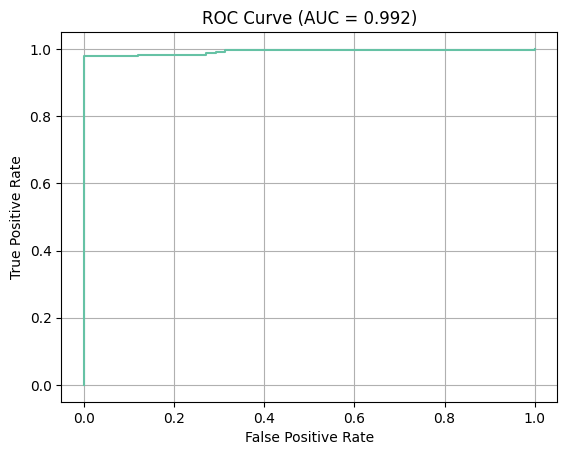

AUC: 0.992


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
probs = best_model.predict(X_test)

# Extract probabilities for the positive class only
probs_positive = probs[:, 0]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs_positive)

# Calculate the AUC score
auc = roc_auc_score(y_test, probs_positive)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f})'.format(auc))
plt.grid(True)
plt.show()

# Print the AUC score
print('AUC: {:.3f}'.format(auc))


- The ROC curve shows a steep rise in the true positive rate while maintaining a low false positive rate, indicating good model performance across different classification thresholds.
- The high AUC score suggests that the model has successfully learned the underlying patterns in the data and can effectively distinguish between the two classes.
- These results are promising and indicate that the model has strong discriminatory power, making it reliable for classification tasks.
- The high AUC Score indicated that the overall performance of the model is exceptionally good.

##**4d) Report the Observation & Discuss the Results**

In this labwork, multiple models are trained with different architectures and hyperparameters to classify a binary dataset (wines). Hyperparameter tuning is then performed to find the best-performing model. 

###**Model Architecture and Hyperparameters**

The architecture of the best model selected based on the hyperparameters identified through a hyperparameter tuning process:

- Input layer: 12 nodes
- Hidden layers: 16 nodes, 8 nodes (using **tanh** activation function)
- Output layer: 1 node with the tanh activation function

The hyperparameters for the best model:
- Learning Rate: 0.01
- Batch Size: 32
- Activation Function: tanh
- Optimizer: Adam

 ### **Results and Performance**
 The best model was evaluated on both the validation and testing datasets. The key metrics are:

Validation results:

    -Validation Accuracy: 0.997434
    -Validation Precision: 1.000000
    -Validation Recall: 0.988679
    -Validation F1 Score: 0.994307

Testing results:

    -Testing Accuracy: 0.993840
    -Testing Precision: 0.995671
    -Testing Recall: 0.978723
    -Testing F1-score: 0.987124


The final model achieved high accuracy, precision, recall, and F1 score on the testing set, indicating good performance in classifying the binary dataset.

We observed that the model achieved a precision score of at least 0.99 on both the validation and testing datasets. This indicates that the model has a very high percentage of ability to make accurate predictions and classify instances correctly. It demonstrates that the model's learned patterns and features effectively generalize to new, unseen data.

The high accuracy results provide confidence in the model's overall performance and its ability to accurately distinguish between the two classes in the binary dataset.

###**Comparison of Validation and Testing Results**

After comparing the validation and testing accuracies, it is evident that the trained model performed exceptionally well in both cases, underscoring its effectiveness. The validation accuracy was recorded as 0.993840, while the testing accuracy slightly trailed at 0.995671.

Typically, the validation accuracy serves as a reliable estimate of the model's performance on unseen data. It is utilized during the training process to fine-tune hyperparameters and assess overall performance. Conversely, the testing accuracy offers an independent evaluation of the model's efficacy on entirely new and unseen data.

The minor difference observed between the validation and testing accuracies can be attributed to inherent variability within the datasets. During training, decisions such as early stopping or hyperparameter selection are made based on the performance on the validation set. Consequently, there may be a slight degree of overfitting to the validation set, resulting in marginally better performance on it compared to the testing set.

### **Conclusion**

  - The model complexity and number of hidden layers affect the performance. As the models become more complex (e.g., model 5), they tend to achieve higher accuracy on the training set. However, this does not necessarily translate to better performance on the validation and testing sets. Overly complex models may lead to overfitting, resulting in lower generalization capability.
  - Different activation functions have varying effects on model performance. In this code, the models were trained using sigmoid, relu, and tanh activation functions. The choice of activation function can impact the model's ability to learn complex patterns in the data.
  - Hyperparameter tuning helps in finding the best combination of hyperparameters for the model. By systematically testing different learning rates, batch sizes, activation functions, and optimizers, the code identifies the best-performing model in terms of validation accuracy. This helps in optimizing the model's performance on unseen data.
  - The final model achieved high accuracy, precision, recall, and F1 score on the testing set, indicating good performance in classifying the binary dataset.
  - The confusion matrices provide insights into the model's performance for each class. They show the number of true positives, true negatives, false positives, and false negatives. This information can be useful for evaluating the model's performance in practical applications.
  - The precision-recall curve demonstrates the trade-off between precision and recall for different classification thresholds. It helps in understanding the model's performance across different thresholds and selecting an appropriate threshold based on specific requirements.
  - The ROC curve visualizes the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) at different classification thresholds. The area under the ROC curve (AUC) provides a measure of the model's overall performance.


  
Based on the results, it can be concluded that the best model, with the selected hyperparameters, is effective in classifying the type of wine (red wine / white wine).

All in all, the high accuracies achieved on both the validation and testing datasets indicate that the model is performing well and generalizing effectively to unseen data. This suggests that the selected hyperparameters, including a learning rate of 0.01, batch size of 32, and the 'tanh' activation function, along with the 'adam' optimizer, are suitable for this task.